In [1]:
!pip install beautifulsoup4

In [ ]:
import pandas as pd

# Read the two CSV files
a = pd.read_csv('/content/gossipcop_real.csv')
b = pd.read_csv('/content/gossipcop_fake.csv')

# Concatenate the two DataFrames along rows (axis=0 is default)
df = pd.concat([a, b], ignore_index=True)

# Save the merged DataFrame to a new CSV file
df.to_csv('merged_data.csv', index=False)


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

# Function to extract text from URL and remove HTML tags
def extract_text_from_url(url):
    try:
        # Handle NaN or invalid URLs
        if pd.isna(url):
            return ""

        # Ensure the URL starts with 'http://' or 'https://'
        if not url.startswith(('http://', 'https://')):
            url = 'https://' + url

        response = requests.get(url)
        response.raise_for_status()

        # Parse the HTML content of the page
        soup = BeautifulSoup(response.text, 'html.parser')


        paragraphs = soup.find_all('p')

        # Combine the text of all paragraphs
        article_text = " ".join([para.get_text() for para in paragraphs])

        # Clean the text (remove extra spaces)
        article_text = " ".join(article_text.split())

        return article_text
    except Exception as e:
        # In case of an error (e.g., URL not found), return an empty string or handle the error
        print(f"Error processing URL {url}: {e}")
        return ""
df=pd.read_csv('merged_data.csv')
df=df[:2000]       #extracting only first 2000 rows because you gave only short period of time
df['extracted_text'] = df['news_url'].apply(extract_text_from_url)

df.to_csv('new_merged', index=False)

Error processing URL https://hollywoodlife.com/2018/05/05/paris-jackson-cara-delevingne-matching-outfits-night-out-nyc-dating-pic/: 404 Client Error: Not Found for url: https://hollywoodlife.com/2018/05/05/paris-jackson-cara-delevingne-matching-outfits-night-out-nyc-dating-pic/
.........


In [ ]:
import pandas as pd
df=pd.read_csv('/content/new_merged.csv')
df

,Unnamed: 0,id,news_url,title,tweet_ids,extracted_text
0,0,gossipcop-2493749932,www.dailymail.co.uk/tvshowbiz/article-5874213/...,Did Miley Cyrus and Liam Hemsworth secretly ge...,284329075902926848\t284332744559968256\t284335...,NaN
1,1,gossipcop-4580247171,hollywoodlife.com/2018/05/05/paris-jackson-car...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,992895508267130880\t992897935418503169\t992899...,NaN
2,2,gossipcop-941805037,variety.com/2017/biz/news/tax-march-donald-tru...,Celebrities Join Tax March in Protest of Donal...,853359353532829696\t853359576543920128\t853359...,By Variety Staff Follow Us on Twitter Thousand...
3,3,gossipcop-2547891536,www.dailymail.co.uk/femail/article-3499192/Do-...,Cindy Crawford's daughter Kaia Gerber wears a ...,988821905196158981\t988824206556172288\t988825...,NaN
4,4,gossipcop-5476631226,variety.com/2018/film/news/list-2018-oscar-nom...,Full List of 2018 Oscar Nominations – Variety,955792793632432131\t955795063925301249\t955798...,By Variety Staff Follow Us on Twitter Oscar no...
...,...,...,...,...,...,...
1995,995,gossipcop-5595775372,www.pinterest.co.uk/daisyrose697/zac-efron/,"Attractive men, Man candy and Beautiful men",1015929522997350400,NaN
1996,996,gossipcop-7830313432,www.news.com.au/entertainment/celebrity-life/h...,Did Mariah Carey just taunt ex James Packer af...,902547157223428100\t902557746360410113\t902678...,NaN
1997,997,gossipcop-2118843089,www.refinery29.com/2018/02/190432/ryan-gosling...,Eva Mendes & Ryan Gosling's Home Is Bursting W...,822179972945244160\t822282781548052484\t822360...,NaN
1998,998,gossipcop-2375563556,hollywoodlife.com/2017/12/20/brad-pitt-christm...,Brad Pitt Getting His Kids For Christmas: His ...,943560537526493185\t943560868389965825\t943561...,NaN


In [ ]:
import spacy

#demo to know about spacy
nlp = spacy.load("en_core_web_sm")
test_text = "The Mona Lisa is valued at $850 million, and the Tesla Model S is a popular product."
doc = nlp(test_text)
for ent in doc.ents:
    print(ent.text, ent.label_)


$850 million MONEY


In [ ]:
df['content'] = df['title'] + " " + df['extracted_text']
sum(df['extracted_text'].isna())

92

In [ ]:
import pandas as pd
import spacy
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Combine title and extracted text into one column
df['content'] = df.apply(
    lambda row: row['title'] if pd.isna(row['extracted_text']) else row['title'] + " " + row['extracted_text'],
    axis=1
)

# Load SpaCy's small English model
nlp = spacy.load("en_core_web_sm")
nlp.max_length = 10000000  # Set max length to a larger value to avoid text length issues

# Extend SpaCy's pipeline to recognize celebrities (confidential use case)
def is_celebrity(name):
    # Add custom rules or integrate with a celebrity knowledge base
    celebrity_list = ["Miley Cyrus", "Liam Hemsworth", "Taylor Swift"]  # Example celebrity names
    return name in celebrity_list

# Define a function to count entities and extract them
def extract_entities(text):
    # Limit the text to the first 1,000,000 characters
    text = text[:1000000]
    doc = nlp(text)
    entities = {
        "PERSON": [],
        "ORG": [],
        "MONEY": [],
        "GPE": [],
        "CELEBRITY": []
    }
    for ent in doc.ents:
        if ent.label_ in entities:
            entities[ent.label_].append(ent.text)
        # Add custom logic for celebrity recognition
        if ent.label_ == "PERSON" and is_celebrity(ent.text):
            entities["CELEBRITY"].append(ent.text)
    return entities

# Apply the function to the content
df['entities'] = df['content'].apply(lambda x: extract_entities(str(x)))

# Extract specific entity types into separate columns
df['person_entities'] = df['entities'].apply(lambda x: ", ".join(x.get("PERSON", [])))
df['org_entities'] = df['entities'].apply(lambda x: ", ".join(x.get("ORG", [])))
df['money_entities'] = df['entities'].apply(lambda x: ", ".join(x.get("MONEY", [])))
df['location_entities'] = df['entities'].apply(lambda x: ", ".join(x.get("GPE", [])))
df['celebrity_entities'] = df['entities'].apply(lambda x: ", ".join(x.get("CELEBRITY", [])))  # New column

# Add counts for each entity type
df['person_count'] = df['entities'].apply(lambda x: len(x.get("PERSON", [])))
df['org_count'] = df['entities'].apply(lambda x: len(x.get("ORG", [])))
df['money_count'] = df['entities'].apply(lambda x: len(x.get("MONEY", [])))
df['location_count'] = df['entities'].apply(lambda x: len(x.get("GPE", [])))
df['celebrity_count'] = df['entities'].apply(lambda x: len(x.get("CELEBRITY", [])))  # New count column

# Drop the intermediate entities column if not needed
df = df.drop(columns=['entities'])

# Count tweet_ids (Assuming tweet_ids are in a column named 'tweet_ids')
df['tweet_count'] = df['tweet_ids'].apply(lambda x: len(x.split('\t')) if isinstance(x, str) else 0)

# Calculate average tweet count across all articles (mean of tweet_count column)
avg_tweet_count = df['tweet_count'].mean()

# Calculate the popularity score for each article: tweet_count / avg_tweet_count
df['popularity_score'] = df['tweet_count'] / avg_tweet_count

# Save the updated DataFrame for further analysis
df.to_csv("articles_with_entity_counts_and_celebrity.csv", index=False)

# Display the DataFrame with new features
print(df[['title', 'person_count', 'org_count', 'money_count', 'location_count', 'celebrity_count', 'popularity_score']].head())


                                               title  person_count  org_count  \
0  Did Miley Cyrus and Liam Hemsworth secretly ge...             2          0   
1  Paris Jackson & Cara Delevingne Enjoy Night Ou...             0          1   
2  Celebrities Join Tax March in Protest of Donal...            14         17   
3  Cindy Crawford's daughter Kaia Gerber wears a ...             3          0   
4      Full List of 2018 Oscar Nominations – Variety           182         29   

   money_count  location_count  celebrity_count  popularity_score  
0            0               0                1          0.825989  
1            0               0                0          0.127730  
2            3               3                0          0.732320  
3            0               0                0          0.119215  
4            0              19                0          0.562013  


In [ ]:
df

,Unnamed: 0,id,news_url,title,tweet_ids,extracted_text,content,person_entities,org_entities,money_entities,...,tweet_count,popularity_score,sentiment_score,vader_sentiment,celebrity_entities,person_count,org_count,money_count,location_count,celebrity_count
0,0,gossipcop-2493749932,www.dailymail.co.uk/tvshowbiz/article-5874213/...,Did Miley Cyrus and Liam Hemsworth secretly ge...,284329075902926848\t284332744559968256\t284335...,NaN,Did Miley Cyrus and Liam Hemsworth secretly ge...,"Miley, Liam Hemsworth",,,...,97,0.825989,-0.075000,0.0000,Liam Hemsworth,2,0,0,0,1
1,1,gossipcop-4580247171,hollywoodlife.com/2018/05/05/paris-jackson-car...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,992895508267130880\t992897935418503169\t992899...,NaN,Paris Jackson & Cara Delevingne Enjoy Night Ou...,,Paris Jackson & Cara Delevingne Enjoy Night Out,,...,15,0.127730,0.500000,0.4939,,0,1,0,0,0
2,2,gossipcop-941805037,variety.com/2017/biz/news/tax-march-donald-tru...,Celebrities Join Tax March in Protest of Donal...,853359353532829696\t853359576543920128\t853359...,By Variety Staff Follow Us on Twitter Thousand...,Celebrities Join Tax March in Protest of Donal...,"Follow Us, Donald Trump, Wolf Hall', Sarah Sil...","Celebrities Join Tax March, Trump, Trump, Trum...","an estimated, #TaxMarch #, #TaxMarch #",...,86,0.732320,0.082287,0.9696,,14,17,3,3,0
3,3,gossipcop-2547891536,www.dailymail.co.uk/femail/article-3499192/Do-...,Cindy Crawford's daughter Kaia Gerber wears a ...,988821905196158981\t988824206556172288\t988825...,NaN,Cindy Crawford's daughter Kaia Gerber wears a ...,"Cindy Crawford's, Kaia Gerber, Harry Styles",,,...,14,0.119215,0.000000,0.0000,,3,0,0,0,0
4,4,gossipcop-5476631226,variety.com/2018/film/news/list-2018-oscar-nom...,Full List of 2018 Oscar Nominations – Variety,955792793632432131\t955795063925301249\t955798...,By Variety Staff Follow Us on Twitter Oscar no...,Full List of 2018 Oscar Nominations – Variety ...,"Follow Us, Oscar, John Bailey, Andy Serkis, Gu...","Tiffany Haddish, Dunkirk, The Academy Awards, ...",,...,66,0.562013,0.157789,0.9908,,182,29,0,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,995,gossipcop-5595775372,www.pinterest.co.uk/daisyrose697/zac-efron/,"Attractive men, Man candy and Beautiful men",1015929522997350400,NaN,"Attractive men, Man candy and Beautiful men",,,,...,1,0.008515,0.825000,0.7783,,0,0,0,0,0
1996,996,gossipcop-7830313432,www.news.com.au/entertainment/celebrity-life/h...,Did Mariah Carey just taunt ex James Packer af...,902547157223428100\t902557746360410113\t902678...,NaN,Did Mariah Carey just taunt ex James Packer af...,"Mariah Carey, James Packer",,,...,6,0.051092,0.000000,-0.3400,,2,0,0,0,0
1997,997,gossipcop-2118843089,www.refinery29.com/2018/02/190432/ryan-gosling...,Eva Mendes & Ryan Gosling's Home Is Bursting W...,822179972945244160\t822282781548052484\t822360...,NaN,Eva Mendes & Ryan Gosling's Home Is Bursting W...,,Eva Mendes & Ryan Gosling's,,...,4,0.034061,-0.500000,-0.1779,,0,1,0,0,0
1998,998,gossipcop-2375563556,hollywoodlife.com/2017/12/20/brad-pitt-christm...,Brad Pitt Getting His Kids For Christmas: His ...,943560537526493185\t943560868389965825\t943561...,NaN,Brad Pitt Getting His Kids For Christmas: His ...,Brad Pitt Getting,,,...,14,0.119215,0.400000,0.5106,,1,0,0,0,0


In [ ]:
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download the VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
vader = SentimentIntensityAnalyzer()

# Define a function to get sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity  # Returns a score between -1 (negative) and 1 (positive)

# Apply sentiment analysis
df['sentiment_score'] = df['content'].apply(get_sentiment)

# Define a function to get sentiment scores using VADER
def vader_sentiment(text):
    scores = vader.polarity_scores(str(text))
    return scores['compound']  # Returns a compound score between -1 (negative) and 1 (positive)

# Apply VADER sentiment analysis
df['vader_sentiment'] = df['content'].apply(vader_sentiment)

df

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Unnamed: 0,id,news_url,title,tweet_ids,extracted_text,content,person_entities,org_entities,money_entities,...,celebrity_entities,person_count,org_count,money_count,location_count,celebrity_count,tweet_count,popularity_score,sentiment_score,vader_sentiment
0,0,gossipcop-2493749932,www.dailymail.co.uk/tvshowbiz/article-5874213/...,Did Miley Cyrus and Liam Hemsworth secretly ge...,284329075902926848\t284332744559968256\t284335...,NaN,Did Miley Cyrus and Liam Hemsworth secretly ge...,"Miley, Liam Hemsworth",,,...,Liam Hemsworth,2,0,0,0,1,97,0.825989,-0.075000,0.0000
1,1,gossipcop-4580247171,hollywoodlife.com/2018/05/05/paris-jackson-car...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,992895508267130880\t992897935418503169\t992899...,NaN,Paris Jackson & Cara Delevingne Enjoy Night Ou...,,Paris Jackson & Cara Delevingne Enjoy Night Out,,...,,0,1,0,0,0,15,0.127730,0.500000,0.4939
2,2,gossipcop-941805037,variety.com/2017/biz/news/tax-march-donald-tru...,Celebrities Join Tax March in Protest of Donal...,853359353532829696\t853359576543920128\t853359...,By Variety Staff Follow Us on Twitter Thousand...,Celebrities Join Tax March in Protest of Donal...,"Follow Us, Donald Trump, Wolf Hall', Sarah Sil...","Celebrities Join Tax March, Trump, Trump, Trum...","an estimated, #TaxMarch #, #TaxMarch #",...,,14,17,3,3,0,86,0.732320,0.082287,0.9696
3,3,gossipcop-2547891536,www.dailymail.co.uk/femail/article-3499192/Do-...,Cindy Crawford's daughter Kaia Gerber wears a ...,988821905196158981\t988824206556172288\t988825...,NaN,Cindy Crawford's daughter Kaia Gerber wears a ...,"Cindy Crawford's, Kaia Gerber, Harry Styles",,,...,,3,0,0,0,0,14,0.119215,0.000000,0.0000
4,4,gossipcop-5476631226,variety.com/2018/film/news/list-2018-oscar-nom...,Full List of 2018 Oscar Nominations – Variety,955792793632432131\t955795063925301249\t955798...,By Variety Staff Follow Us on Twitter Oscar no...,Full List of 2018 Oscar Nominations – Variety ...,"Follow Us, Oscar, John Bailey, Andy Serkis, Gu...","Tiffany Haddish, Dunkirk, The Academy Awards, ...",,...,,182,29,0,19,0,66,0.562013,0.157789,0.9908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,995,gossipcop-5595775372,www.pinterest.co.uk/daisyrose697/zac-efron/,"Attractive men, Man candy and Beautiful men",1015929522997350400,NaN,"Attractive men, Man candy and Beautiful men",,,,...,,0,0,0,0,0,1,0.008515,0.825000,0.7783
1996,996,gossipcop-7830313432,www.news.com.au/entertainment/celebrity-life/h...,Did Mariah Carey just taunt ex James Packer af...,902547157223428100\t902557746360410113\t902678...,NaN,Did Mariah Carey just taunt ex James Packer af...,"Mariah Carey, James Packer",,,...,,2,0,0,0,0,6,0.051092,0.000000,-0.3400
1997,997,gossipcop-2118843089,www.refinery29.com/2018/02/190432/ryan-gosling...,Eva Mendes & Ryan Gosling's Home Is Bursting W...,822179972945244160\t822282781548052484\t822360...,NaN,Eva Mendes & Ryan Gosling's Home Is Bursting W...,,Eva Mendes & Ryan Gosling's,,...,,0,1,0,0,0,4,0.034061,-0.500000,-0.1779
1998,998,gossipcop-2375563556,hollywoodlife.com/2017/12/20/brad-pitt-christm...,Brad Pitt Getting His Kids For Christmas: His ...,943560537526493185\t943560868389965825\t943561...,NaN,Brad Pitt Getting His Kids For Christmas: His ...,Brad Pitt Getting,,,...,,1,0,0,0,0,14,0.119215,0.400000,0.5106


In [ ]:
df.head(1)

,Unnamed: 0,id,news_url,title,tweet_ids,extracted_text,content,person_entities,org_entities,money_entities,...,celebrity_entities,person_count,org_count,money_count,location_count,celebrity_count,tweet_count,popularity_score,sentiment_score,vader_sentiment
0,0,gossipcop-2493749932,www.dailymail.co.uk/tvshowbiz/article-5874213/...,Did Miley Cyrus and Liam Hemsworth secretly ge...,284329075902926848\t284332744559968256\t284335...,NaN,Did Miley Cyrus and Liam Hemsworth secretly ge...,"Miley, Liam Hemsworth",,,...,Liam Hemsworth,2,0,0,0,1,97,0.825989,-0.075,0.0


In [ ]:
df = df[['tweet_count', 'sentiment_score', 'vader_sentiment', 'person_count','popularity_score', 'org_count', 'money_count', 'location_count', 'celebrity_count']]
df[0:1]

,tweet_count,sentiment_score,vader_sentiment,person_count,popularity_score,org_count,money_count,location_count,celebrity_count
0,97,-0.075,0.0,2,0.825989,0,0,0,1


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

# Split data into features (X) and target (y)
y = df['popularity_score']
X = df.drop(columns=['popularity_score'])  # Drop the target variable

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a dictionary to store models and their parameter grids
models = {
    "DecisionTreeRegressor": {
        "model": DecisionTreeRegressor(random_state=42),
        "param_grid": {
            "max_depth": [3, 5, 10, None],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }
    },
    "GradientBoostingRegressor": {
        "model": GradientBoostingRegressor(random_state=42),
        "param_grid": {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.05, 0.1],
            "max_depth": [3, 5, 7]
        }
    },
    "XGBoostRegressor": {
        "model": xgb.XGBRegressor(random_state=42),
        "param_grid": {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.05, 0.1],
            "max_depth": [3, 5, 7]
        }
    }
}

# Store the results
best_models = {}
results = []

# Perform GridSearchCV for each model
for model_name, config in models.items():
    print(f"Training {model_name}...")
    grid = GridSearchCV(
        estimator=config["model"],
        param_grid=config["param_grid"],
        cv=5,  # 5-fold cross-validation
        scoring='neg_mean_absolute_error',  # Use MAE as the scoring metric
        n_jobs=-1
    )
    grid.fit(X_train, y_train)

    # Store the best model and its parameters
    best_models[model_name] = grid.best_estimator_
    results.append({
        "Model": model_name,
        "Best Parameters": grid.best_params_,
        "Best MAE (CV)": -grid.best_score_
    })

# Evaluate the best models on the test set
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"\n{model_name} Performance on Test Set:")
    print(f"MAE: {mae:.4f}, MSE: {mse:.4f}")

# Save results in a DataFrame for better visualization
results_df = pd.DataFrame(results)
print("\nGrid Search Results:")
print(results_df)


Training DecisionTreeRegressor...
Training GradientBoostingRegressor...
Training XGBoostRegressor...

DecisionTreeRegressor Performance on Test Set:
MAE: 0.0085, MSE: 0.0025

GradientBoostingRegressor Performance on Test Set:
MAE: 0.0054, MSE: 0.0004

XGBoostRegressor Performance on Test Set:
MAE: 0.0208, MSE: 0.0164

Grid Search Results:
                       Model  \
0      DecisionTreeRegressor   
1  GradientBoostingRegressor   
2           XGBoostRegressor   

                                     Best Parameters  Best MAE (CV)  
0  {'max_depth': None, 'min_samples_leaf': 1, 'mi...       0.017629  
1  {'learning_rate': 0.05, 'max_depth': 3, 'n_est...       0.011008  
2  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...       0.017058  


In [ ]:
len(X_test)

400

In [ ]:
# Use the best model (GradientBoostingRegressor with the best parameters)
best_model = GradientBoostingRegressor(learning_rate=0.05, max_depth=3, n_estimators=100)

# Train the best model on the training data
best_model.fit(X_train, y_train)

# Make predictions using the test data
y_pred = best_model.predict(X_test)

# Create a DataFrame to store the actual and predicted values
results_df = pd.DataFrame({
    'Actual': y_test,   # Actual values from the test set
    'Predicted': y_pred  # Predictions made by the model
})

# Save the results to a CSV file
results_df.to_csv('predictions_vs_actuals.csv', index=False)

# Display the first few rows of the results
print(results_df.head())


        Actual  Predicted
1860  0.476860   0.478859
353   8.157704   8.104418
1333  0.025546   0.034143
905   0.051092   0.057844
1289  0.085153   0.090188


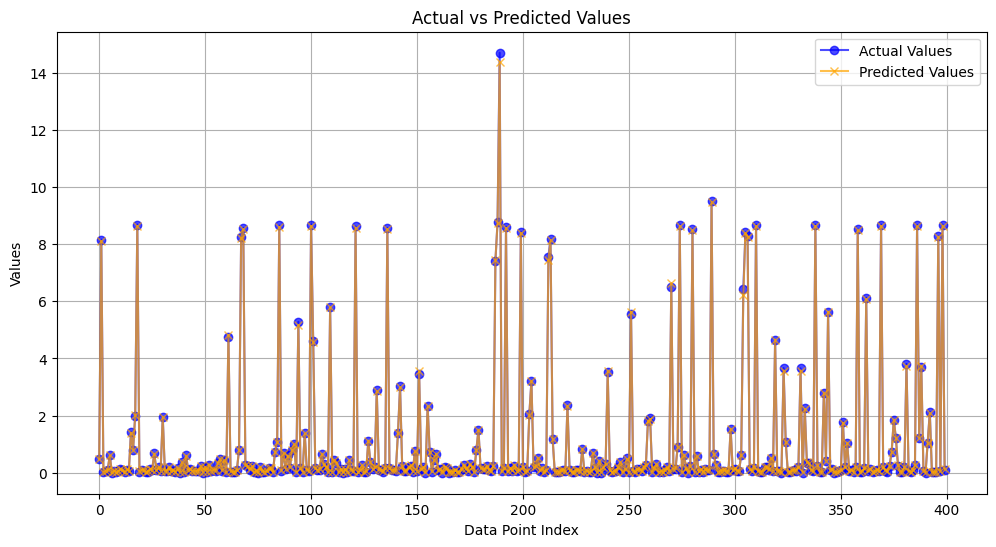

In [ ]:
import matplotlib.pyplot as plt

# Ensure y_test and y_pred are in the same order
y_test = y_test.reset_index(drop=True)
y_pred = pd.Series(y_pred)

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Actual Values', marker='o', color='blue', alpha=0.7)
plt.plot(range(len(y_pred)), y_pred, label='Predicted Values', marker='x', color='orange', alpha=0.7)
plt.xlabel('Data Point Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


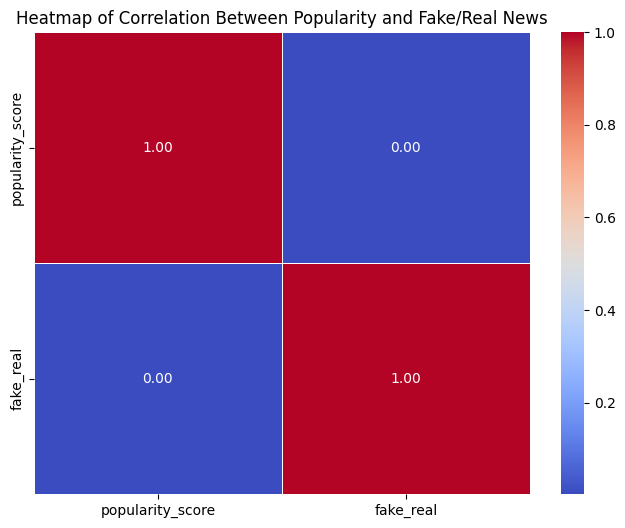

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Add a column to classify Fake (0) and Real (1) news
df['fake_real'] = [0 if i < 1000 else 1 for i in range(len(df))]

# Step 2: Select relevant columns for correlation
correlation_data = df[['popularity_score', 'fake_real']]

# Step 3: Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Step 4: Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Correlation Between Popularity and Fake/Real News")
plt.show()
